# State Task Network (Chu, et. al, 2013)

## Example (Chu, et al., 2013)

### Reference

Chu, Y., Wassick, J. M., & You, F. (2013). Efficient scheduling method of complex batch processes with general network structure via agent‐based modeling. AIChE Journal, 59(8), 2884-2906.

### Encoding the State Task Network

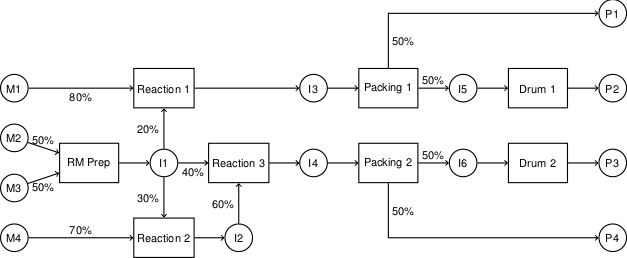

In [12]:
%matplotlib inline

import sys
sys.path.append('../STN')
from STN import STN

# create instance
stn = STN()

# states
stn.state('M1', capacity = 500, init = 500)
stn.state('M2', capacity = 500, init = 500)
stn.state('M3', capacity = 500, init = 500)
stn.state('M3', capacity = 500, init = 500)
stn.state('M4', capacity = 500, init = 500)
stn.state('I1', capacity = 100)
stn.state('I2', capacity = 100)
stn.state('I3', capacity = 100)
stn.state('I4', capacity = 100)
stn.state('I5', capacity = 100)
stn.state('I6', capacity = 100)
stn.state('P1', capacity = 500)
stn.state('P2', capacity = 500)
stn.state('P3', capacity = 500)
stn.state('P4', capacity = 500)

# state to task arcs
stn.stArc('M1', 'Reaction_1', rho = 0.8)
stn.stArc('M2', 'RM Prep',    rho = 0.5)
stn.stArc('M3', 'RM Prep',    rho = 0.5)
stn.stArc('M4', 'Reaction_2', rho = 0.7)
stn.stArc('I1', 'Reaction_1', rho = 0.2)
stn.stArc('I1', 'Reaction_2', rho = 0.3)
stn.stArc('I1', 'Reaction_3', rho = 0.4)
stn.stArc('I2', 'Reaction_3', rho = 0.6)
stn.stArc('I3', 'Packing_1',  rho = 1.0)
stn.stArc('I4', 'Packing_2',  rho = 1.0)
stn.stArc('I5', 'Drum_1',     rho = 1.0)
stn.stArc('I6', 'Drum_2',     rho = 1.0)

# task to state arcs
stn.tsArc('RM Prep',    'I1', rho = 1.0, dur =  72)
stn.tsArc('Reaction_1', 'I3', rho = 1.0, dur = 162)
stn.tsArc('Reaction_2', 'I2', rho = 1.0, dur = 138)
stn.tsArc('Reaction_3', 'I4', rho = 1.0, dur = 162)
stn.tsArc('Packing_1',  'P1', rho = 0.5, dur = 108)
stn.tsArc('Packing_1',  'I5', rho = 0.5, dur = 108)
stn.tsArc('Packing_2',  'I6', rho = 0.5, dur = 108)
stn.tsArc('Packing_2',  'P4', rho = 0.5, dur = 108)
stn.tsArc('Drum_1',     'P2', rho = 1.0, dur =  90)
stn.tsArc('Drum_2',     'P3', rho = 1.0, dur =  90)

### Task Information

|Task|Processing Time|Max Batch|Fixed Cost|Variable Cost|
|-:|:-:|:-:|:-:|:-:|
|RM Prep|72|100|1000|50|
|Reaction 1|162|80|3000|250|
|Reaction 2|138|50|1500|150|
|Reaction 3|162|80|2000|100|
|Packing 1|108|100|500|20|
|Packing 2|108|100|500|20|
|Drumming 1|90|50|200|50|
|Drumming 2|90|50|200|50|

In [13]:
# unit-task information

stn.unit('RM Prep',   'RM Prep',    Bmax = 100, cost = 1000, vcost =  50)
stn.unit('Reactor_1', 'Reaction_1', Bmax =  80, cost = 3000, vcost = 250)
stn.unit('Reactor_1', 'Reaction_2', Bmax =  50, cost = 1500, vcost = 150)
stn.unit('Reactor_1', 'Reaction_3', Bmax =  80, cost = 2000, vcost = 100)
stn.unit('Reactor_2', 'Reaction_1', Bmax =  80, cost = 3000, vcost = 250)
stn.unit('Reactor_2', 'Reaction_2', Bmax =  50, cost = 1500, vcost = 150)
stn.unit('Reactor_2', 'Reaction_3', Bmax =  80, cost = 2000, vcost = 100)
stn.unit('Finishing', 'Packing_1',  Bmax = 100, cost =  500, vcost =  20)
stn.unit('Finishing', 'Packing_2',  Bmax = 100, cost =  500, vcost =  20)
stn.unit('Drumming',  'Drum_1',     Bmax =  50, cost =  200, vcost =  50)
stn.unit('Drumming',  'Drum_2',     Bmax =  50, cost =  200, vcost =  50)

## Case 1: Small Orders without Task Changeover Constraints

In [14]:
N = 149
H = 6*N
stn.build(range(0,H+1,6))

# production constraints
stn.model.cons.add(stn.model.S['P1',H] == 100)
stn.model.cons.add(stn.model.S['P2',H] == 100)
stn.model.cons.add(stn.model.S['P3',H] ==  50)
stn.model.cons.add(stn.model.S['P4',H] ==  50)

stn.solve('gurobi')

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: x14853
  Lower bound: -106500.0
  Upper bound: -106500.0
  Number of objectives: 1
  Number of constraints: 9757
  Number of variables: 6153
  Number of binary variables: 1650
  Number of integer variables: 1650
  Number of continuous variables: 4503
  Number of nonzeros: 56546
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Return code: 0
  Message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Termination condition: optimal
  Termination message: Model was s

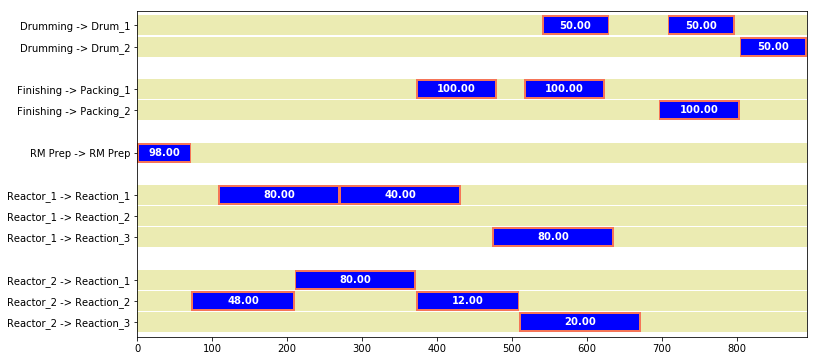

In [15]:
stn.gantt()

## Case 2: Increase in Orders without Task Changeover Constraints

In [20]:
N = 203
H = 6*N
stn.build(range(0,H+1,6))

# production constraints
stn.model.cons.add(stn.model.S['P1',H] == 200)
stn.model.cons.add(stn.model.S['P2',H] == 200)
stn.model.cons.add(stn.model.S['P3',H] == 100)
stn.model.cons.add(stn.model.S['P4',H] == 100)

stn.solve('gurobi')

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: x20199
  Lower bound: -206500.0
  Upper bound: -206480.714286
  Number of objectives: 1
  Number of constraints: 13267
  Number of variables: 8367
  Number of binary variables: 2244
  Number of integer variables: 2244
  Number of continuous variables: 6123
  Number of nonzeros: 77984
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Return code: 0
  Message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Termination condition: optimal
  Termination message: Model

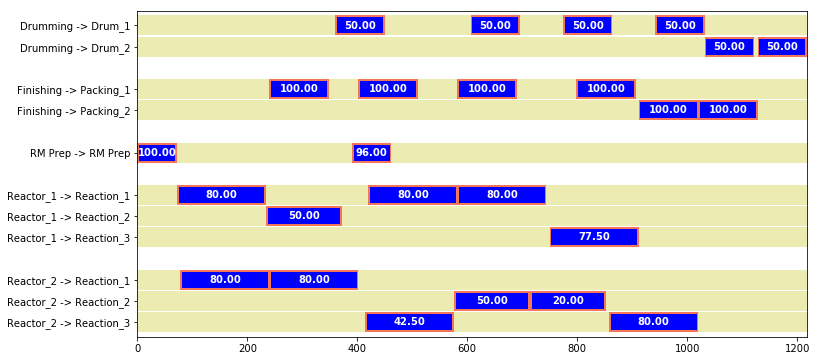

In [19]:
stn.gantt()

## Case 3: Increased Orders with Task Changeover Constraints

### Changeover Times

| |Reaction 1| Reaction 2|Reaction 3|
|-:|:-:|:-:|:-:|
|Reaction 1|12|30|30|
|Reaction 2|30|12|6|
|Reaction 3|30|30|12|

| |Packing 1|Packing 2|
|-:|:-:|:-:|
|Packing 1|0|6|
|Packing 2|6|0|

In [21]:
# sequence dependent changever time from task1 to task2

stn.changeover('Reaction_1', 'Reaction_1', 12)
stn.changeover('Reaction_1', 'Reaction_2', 30)
stn.changeover('Reaction_1', 'Reaction_3', 30)
stn.changeover('Reaction_2', 'Reaction_1', 30)
stn.changeover('Reaction_2', 'Reaction_2', 12)
stn.changeover('Reaction_2', 'Reaction_3',  6)
stn.changeover('Reaction_3', 'Reaction_1', 30)
stn.changeover('Reaction_3', 'Reaction_2', 30)
stn.changeover('Reaction_3', 'Reaction_3', 12)

stn.changeover('Packing_1',  'Packing_1',   0)
stn.changeover('Packing_1',  'Packing_2',   6)
stn.changeover('Packing_2',  'Packing_1',   6)
stn.changeover('Packing_1',  'Packing_1',   0)

In [22]:
N = 215
H = 6*N
stn.build(range(0,H+1,6))

# production constraints
stn.model.cons.add(stn.model.S['P1',H] == 200)
stn.model.cons.add(stn.model.S['P2',H] == 200)
stn.model.cons.add(stn.model.S['P3',H] == 100)
stn.model.cons.add(stn.model.S['P4',H] == 100)

stn.solve('gurobi')

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: x21387
  Lower bound: -206500.0
  Upper bound: -206479.625
  Number of objectives: 1
  Number of constraints: 2703247
  Number of variables: 8859
  Number of binary variables: 2376
  Number of integer variables: 2376
  Number of continuous variables: 6483
  Number of nonzeros: 5461148
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Return code: 0
  Message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Termination condition: optimal
  Termination message: Mode

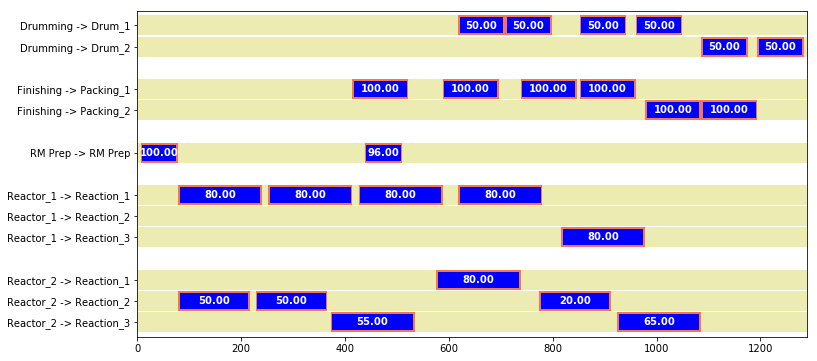

In [23]:
stn.gantt()